In [1]:
# -----------------------------
# 1. Import libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
# (optional) from sklearn.ensemble import RandomForestRegressor


In [2]:
# -----------------------------
# 2. Load the dataset
# -----------------------------
dataframe = pd.read_csv("/content/Zomato data .csv")
print(dataframe)


                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [3]:
# -----------------------------
# 3. Convert rating text to numeric
# -----------------------------
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
# -----------------------------
# 4. Basic info check
# -----------------------------
dataframe.info()
dataframe.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


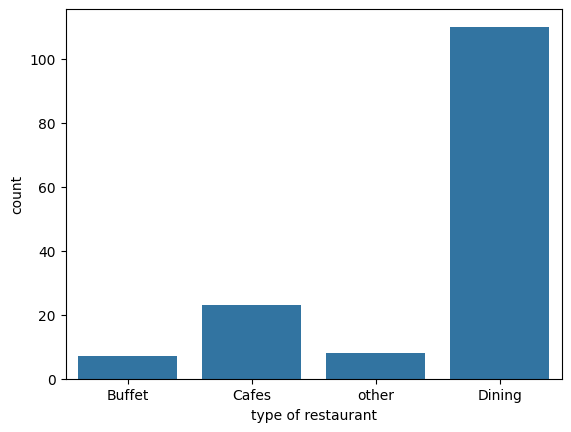

In [5]:
# -----------------------------
# 5. EDA – type of restaurant
# -----------------------------
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurant")
plt.show()


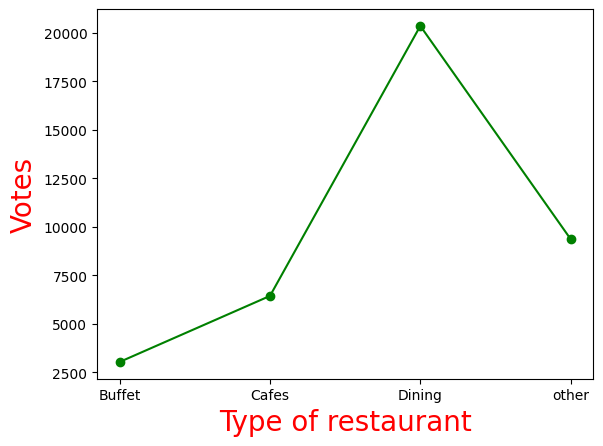

In [6]:
# -----------------------------
# 6. Total votes by restaurant type
# -----------------------------
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)
plt.show()


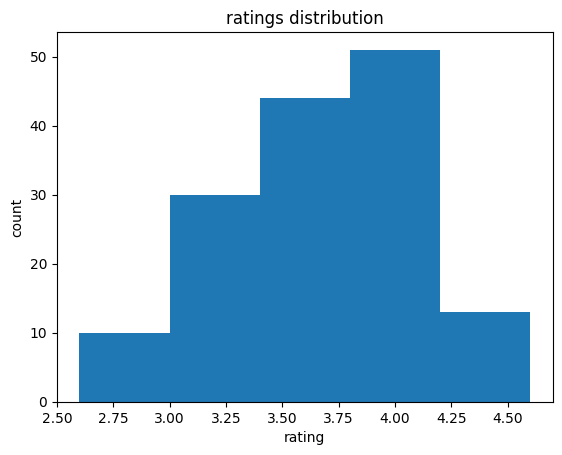

In [7]:
# -----------------------------
# 7. Ratings distribution
# -----------------------------
plt.hist(dataframe['rate'], bins=5)
plt.title("ratings distribution")
plt.xlabel("rating")
plt.ylabel("count")
plt.show()


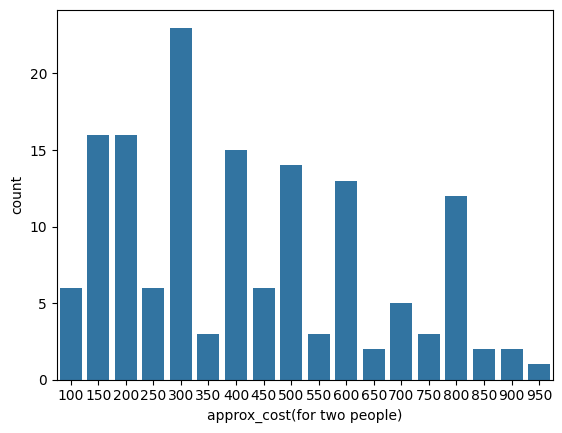

In [8]:
# -----------------------------
# 8. Approximate cost distribution
# -----------------------------
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel("approx_cost(for two people)")
plt.ylabel("count")
plt.show()


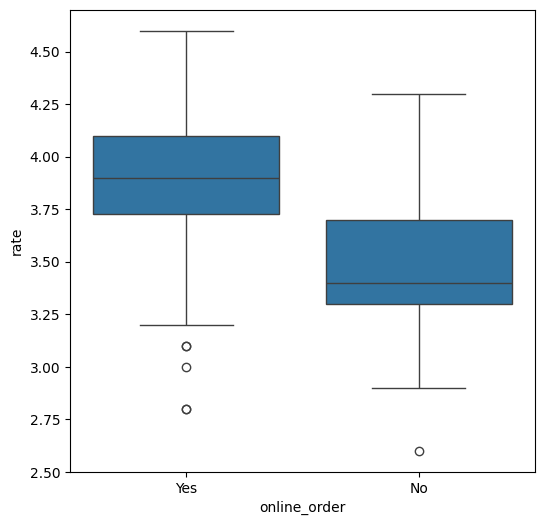

In [9]:
# -----------------------------
# 9. Boxplot: rating vs online_order
# -----------------------------
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y='rate', data=dataframe)
plt.xlabel("online_order")
plt.ylabel("rate")
plt.show()


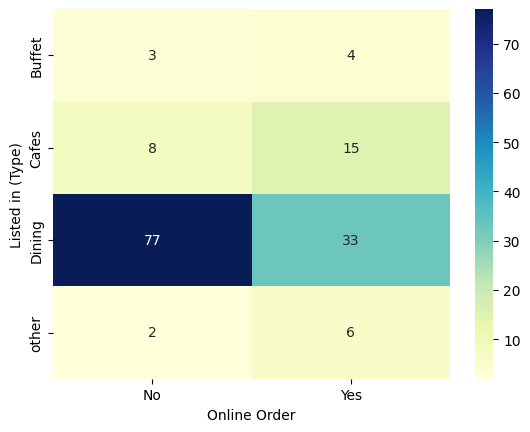

In [10]:
# -----------------------------
# 10. Heatmap: type vs online_order
# -----------------------------
pivot_table = dataframe.pivot_table(
    index='listed_in(type)',
    columns='online_order',
    aggfunc='size',
    fill_value=0
)

sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.xlabel("Online Order")
plt.ylabel("Listed in (Type)")
plt.show()


In [11]:
# -----------------------------
# 11. Prepare data for ML model
#     Target: rate
#     Features: online_order, book_table, approx_cost(for two people), listed_in(type)
# -----------------------------

# Copy dataframe to avoid accidental changes
df_ml = dataframe.copy()

# Encode binary categorical columns (Yes/No) using LabelEncoder
le = LabelEncoder()
df_ml['online_order_enc'] = le.fit_transform(df_ml['online_order'])  # Yes/No -> 1/0
df_ml['book_table_enc'] = le.fit_transform(df_ml['book_table'])      # Yes/No -> 1/0

# One-hot encode restaurant type (Buffet / Dining)
df_ml = pd.get_dummies(df_ml, columns=['listed_in(type)'], drop_first=True)

# Define features X and target y
feature_cols = ['online_order_enc', 'book_table_enc',
                'approx_cost(for two people)'] + \
               [col for col in df_ml.columns if col.startswith('listed_in(type)_')]

X = df_ml[feature_cols]
y = df_ml['rate']

print("Feature columns used for ML:")
print(feature_cols)


Feature columns used for ML:
['online_order_enc', 'book_table_enc', 'approx_cost(for two people)', 'listed_in(type)_Cafes', 'listed_in(type)_Dining', 'listed_in(type)_other']


In [12]:
# -----------------------------
# 12. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (118, 6)
Test shape: (30, 6)


In [13]:
# -----------------------------
# 13. Train a regression model (Linear Regression)
# -----------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)


In [14]:
# -----------------------------
# 14. Evaluate the model
# -----------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print("MAE  :", mae)
print("RMSE :", rmse)
print("R²   :", r2)


Linear Regression Performance:
MAE  : 0.35068260314210986
RMSE : 0.45766628597568876
R²   : 0.01795902069752675


In [15]:
# -----------------------------
# 15. (Optional) Inspect feature coefficients
# -----------------------------
coef_df = pd.DataFrame({
    'feature': feature_cols,
    'coefficient': lr_model.coef_
})
print(coef_df)


                       feature  coefficient
0             online_order_enc     0.342154
1               book_table_enc     0.304870
2  approx_cost(for two people)     0.000041
3        listed_in(type)_Cafes    -0.141244
4       listed_in(type)_Dining    -0.104692
5        listed_in(type)_other     0.135255


In [16]:
# Evaluate the Linear Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")


Linear Regression Performance:
MAE  : 0.351
RMSE : 0.458
R²   : 0.018


In [17]:
# Check how each feature influences the rating
coef_df = pd.DataFrame({
    'feature': feature_cols,
    'coefficient': lr_model.coef_
}).sort_values(by='coefficient', ascending=False)

print("Feature coefficients (higher means more positive impact on rating):")
print(coef_df)


Feature coefficients (higher means more positive impact on rating):
                       feature  coefficient
0             online_order_enc     0.342154
1               book_table_enc     0.304870
5        listed_in(type)_other     0.135255
2  approx_cost(for two people)     0.000041
4       listed_in(type)_Dining    -0.104692
3        listed_in(type)_Cafes    -0.141244


In [18]:
# Create a small table of actual vs predicted ratings
comparison_df = pd.DataFrame({
    'actual_rate': y_test.values,
    'predicted_rate': y_pred
})

print(comparison_df.head(10))


   actual_rate  predicted_rate
0          2.9        3.487887
1          4.1        3.819718
2          2.9        3.477564
3          3.1        3.793490
4          3.2        3.496146
5          4.2        4.102489
6          4.1        3.819718
7          2.8        4.074118
8          4.2        3.830042
9          4.2        3.799684


In [19]:
# assuming you already have mae and the rating range is roughly 1 to 5
rating_range = 4.0

avg_relative_error = mae / rating_range
accuracy_percent = (1 - avg_relative_error) * 100

print(f"Approximate percentage accuracy: {accuracy_percent:.2f}%")


Approximate percentage accuracy: 91.23%
